# Python для визуализации данных

*Рогович Татьяна, Валентин Бирюков, ВШЭ*

## Упраженения

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('babies_all.csv', index_col=0)
pima = pd.read_csv('pima-indians-diabetes.csv')


/Users/pro/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
babies.tail()

,name,sex,number,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [110]:
babies.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

2) Какое имя в датасете находится по индексом 121?

In [5]:
babies.name.iloc[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [6]:
babies[babies.name == 'Aaron'].number.sum()

527668

4) Насколько больше за все время родилось мальчиков чем девочек?

In [7]:
babies[babies.sex == 'M'].number.sum() - babies[babies.sex == 'F'].number.sum()

2422447

5) Cколько мальчиков родилось в 2010?

In [120]:
babies[(babies.sex == 'M') & (babies.year == 2010)].number.sum()

1898382

6) Сколько в датасете девочек по имени John?

In [121]:
babies[(babies.name == 'John') & (babies.sex == 'F')].number.sum()

21578

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [42]:
# 1
babies_girls = pd.DataFrame(babies[babies.sex == 'F'].groupby('year').sum())
babies_boys = pd.DataFrame(babies[babies.sex == 'M'].groupby('year').sum())

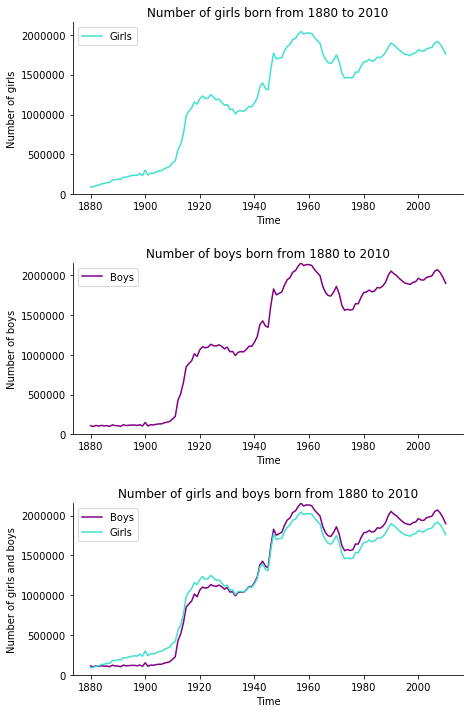

In [46]:
# 2, 3, 4, 5
fig, ax = plt.subplots(3,1, figsize=[7,12])
plt.subplots_adjust(hspace=0.4)

for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('Time')
    ax[x].set_ylim((0, max(babies_boys.number)))
   

ax[0].plot(babies_girls.number, color = 'turquoise')
ax[0].set_ylabel('Number of girls')
ax[0].legend(['Girls'])
ax[0].set_title('Number of girls born from 1880 to 2010')
ax[1].plot(babies_boys.number, color = 'purple')
ax[1].set_ylabel('Number of boys')
ax[1].legend(['Boys'])
ax[1].set_title('Number of boys born from 1880 to 2010')
ax[2].plot(babies_boys.number, color = 'purple')
ax[2].plot(babies_girls.number, color = 'turquoise')
ax[2].set_ylabel('Number of girls and boys')
ax[2].set_title('Number of girls and boys born from 1880 to 2010')
ax[2].legend(['Boys', 'Girls'])

In [132]:
# 6

Динамика рождаемости мальчиков и девочек по больше части одинакова. С 1880 и до конца 1920-ых гг. наблюдается рост темпов рождаемости, за которым следует падение, которое, вероятно, являетя следствием Великой депрессии в Штатах. Ближе к 40-ым годам ситуация стабилизируется, и количество рожденных детей в год снова начинает расти вплоть до 60-ых годов, пока не достигает исторического пика, за которым следует падение темпов рождаемости. Ближе к 1980-ым годам количество рожденных детей в год вновь показывает положительную динамику. 

Кроме того, можно заметить, что количество рожденных девочек с 1880 года и до 1930-ых годов превышало количество рожденных мальчиков в год. Примерно до 50-х годов количество рожденных мальчиков и девочек было на одном уровне, после чего разница в годовой рождаемости начала расти в пользу мальчиков.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



In [147]:
# 1
print(babies[babies.sex == 'F'].groupby('name')['number'].sum().sort_values(ascending=False)[:2])
print(' ')
print(babies[babies.sex == 'M'].groupby('name')['number'].sum().sort_values(ascending=False)[:2])

name
Mary        4103935
Patricia    1568742
Name: number, dtype: int64
 
name
James    5049727
John     5040319
Name: number, dtype: int64


In [152]:
# 2
babies_Mary = babies[babies.name == 'Mary'].groupby('year').sum()
babies_Patricia = babies[babies.name == 'Patricia'].groupby('year').sum()
babies_James = babies[babies.name == 'James'].groupby('year').sum()
babies_John = babies[babies.name == 'John'].groupby('year').sum()

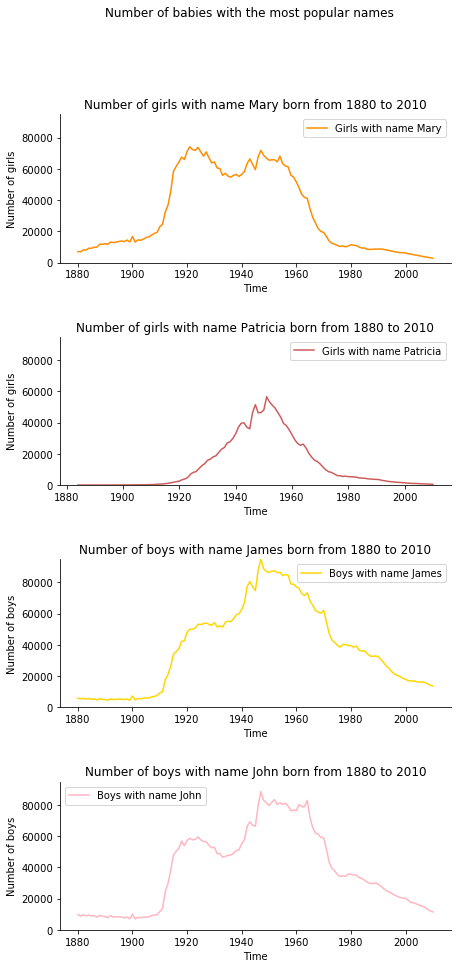

In [164]:
# 3, 4, 5, 6
fig, ax = plt.subplots(4,1, figsize=[7,15])
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Number of babies with the most popular names')

for x in range(4):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('Time')
    ax[x].set_ylim((0, max(babies_James.number)))
    
ax[0].plot(babies_Mary.number, color = 'darkorange')
ax[0].set_ylabel('Number of girls')
ax[0].legend(['Girls with name Mary'])
ax[0].set_title('Number of girls with name Mary born from 1880 to 2010')

ax[1].plot(babies_Patricia.number, color = 'indianred')
ax[1].set_ylabel('Number of girls')
ax[1].legend(['Girls with name Patricia'])
ax[1].set_title('Number of girls with name Patricia born from 1880 to 2010')

ax[2].plot(babies_James.number, color = 'gold')
ax[2].set_ylabel('Number of boys')
ax[2].set_title('Number of boys with name James born from 1880 to 2010')
ax[2].legend(['Boys with name James'])

ax[3].plot(babies_John.number, color = 'lightpink')
ax[3].set_ylabel('Number of boys')
ax[3].set_title('Number of boys with name John born from 1880 to 2010')
ax[3].legend(['Boys with name John'])

In [ ]:
# 7

Мери: имя Мери стало популярно примерно в 1910-ых годах и оставалось таковым вплоть до конца 1950-х, после чего его популярность стала резко снижаться. Динамика популярности имени до 1920-ых совпадает с динамикой прироста количества девочек за тот же период.

Патриция: до 1920-ых годов этим именем в США практически не называли детей, пик популярности имени пришелся на 50-ые годы, после чего его стали использовать все реже и реже.

Джеймс и Джон: динамика популярности имен похожа на динамику количества рожденных детей до 1970-ых годов. Пик популярности имен приходится примерно на середину прошлого столетия, а по мере приближения к новому столетию популярность падает, как и в случае женских имен. 

Можно сделать вывод, что самые популярные имена за период с 1880 по 2010 года были на самом деле популярны в начале-середине прошлого столетия.

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

In [174]:
# 1
babies['first_letter'] = pd.DataFrame([babies.name.iloc[x][0] for x in range(babies.shape[0])])

In [70]:
# 2
data_1920 = pd.DataFrame(babies[babies.year == 1920].groupby('first_letter')['number'].sum())
data_1980 = pd.DataFrame(babies[babies.year == 1980].groupby('first_letter')['number'].sum())
data_2010 = pd.DataFrame(babies[babies.year == 2010].groupby('first_letter')['number'].sum())

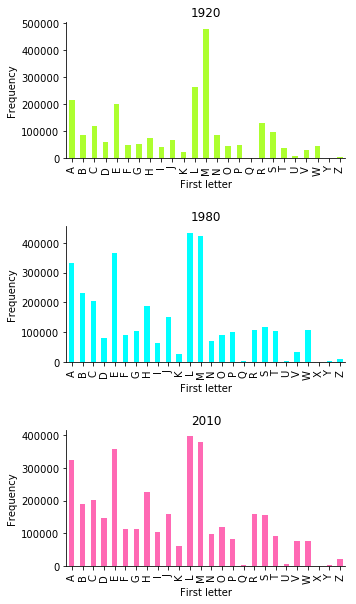

In [186]:
# 3, 4, 5
fig, ax = plt.subplots(3,1, figsize=[5,10])
plt.subplots_adjust(hspace=0.5)

for x in range(3):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].set_xlabel('First letter')
    ax[x].set_ylabel('Frequency')

data_1920.number.plot(kind='bar', ax=ax[0], color='greenyellow')
ax[0].set_title('1920')
ax[0].set_xlabel('First letter')
data_1980.number.plot(kind='bar', ax=ax[1], color='aqua')
ax[1].set_title('1980')
ax[1].set_xlabel('First letter')
data_2010.number.plot(kind='bar', ax=ax[2], color='hotpink')
ax[2].set_title('2010')
ax[2].set_xlabel('First letter')

In [187]:
# 6

Буква M стабильно занимала первое/второе места в рейтинге букв. Буквы L, A и F со временем приобрели большую популярность и к 2010 году входили в топ рейтинга. Популярность других букв менялась не столь сильно.

## Задание 4

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


In [189]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
pima['Class'] = pd.Categorical(pima['Class'])

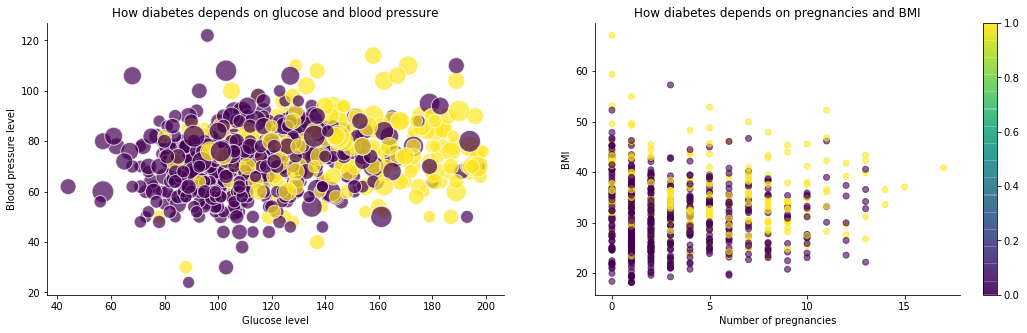

In [214]:
# 1, 2, 3, 4
fig, ax = plt.subplots(1,2, figsize=[18,5])

for x in range(2):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)


graph0 = ax[0].scatter(x=pima['Glucose'], y=pima['BloodPressure'], s=pima['Age']*7, c=pima['Class'].cat.codes, edgecolors="white", alpha=0.7)
ax[0].set_title('How diabetes depends on glucose and blood pressure')
ax[0].set_xlabel('Glucose level')
ax[0].set_ylabel('Blood pressure level')
plt.colorbar(graph0)
ax[1].scatter(pima['Pregnancies'], pima['BMI'], c=pima['Class'], alpha=0.6)
ax[1].locator_params(integer=True) 
ax[1].set_title('How diabetes depends on pregnancies and BMI')
ax[1].set_xlabel('Number of pregnancies')
ax[1].set_ylabel('BMI')

In [ ]:
# 5

Наблюдается сильная корреляция между высоким уровнем глюкозы (~ > 140) и наличием диабета, при этом зависимость наличия диабета от давления и возраста не так очевидна. По второму графику можно сказать, что с увеличением количества беременностей растет наблюдаемая заболеваемость диабетом. Кроме того, высокий индекс массы тела может быть риск-фактором, увеличивающим вероятность развития диабета. 

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одни объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

In [244]:
# 1
pregns = pima.groupby('Pregnancies')['Glucose', 'BMI'].mean()
pregns_cols = list(pregns.columns)
pregns_cols[0], pregns_cols[1] = 'mean_glucose', 'mean_bmi'
pregns.columns = pregns_cols

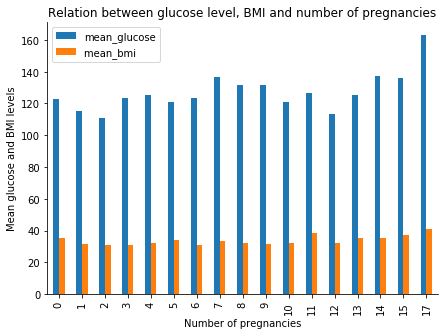

In [240]:
# 2, 3, 4
fig, ax = plt.subplots(1,1, figsize=[7,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Relation between glucose level, BMI and number of pregnancies')


pregns.plot(kind='bar', ax=ax)
ax.set_xlabel('Number of pregnancies')
ax.set_ylabel('Mean glucose and BMI levels')

In [247]:
# 5

Четкой зависимости между уровнем глюкозы, индексом BMI и количеством беременностей не прослеживается.